<a href="https://colab.research.google.com/github/SumedhaSinghRathor/Image-Segmentation-using-color-spaces/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing OpenCV

In [92]:
pip install opencv-python

In [93]:
import cv2

Storing all color conversions OpenCV provides and storing them in a variable

In [94]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
len(flags)

374

In [95]:
flags[40]

'COLOR_BAYER_GR2GRAY'

Importing rest of the dependencies

In [96]:
import matplotlib.pyplot as plt
import numpy as np

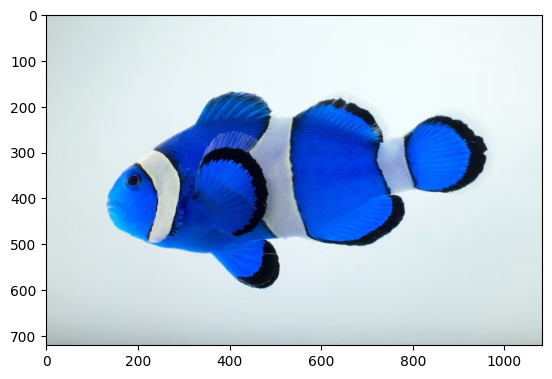

In [97]:
img = cv2.imread('./sample_data/clownfish0.jpg')
plt.imshow(img)
plt.show()

Converting from BGR to RGB (as OpenCV reads images in BGR)

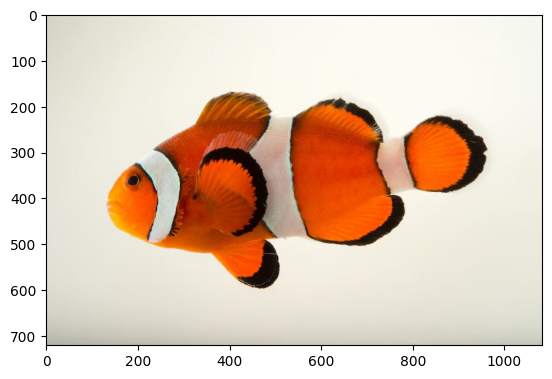

In [98]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Importing dependencies for colored 3d scatter plot

In [99]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

Setting up a 3D plot

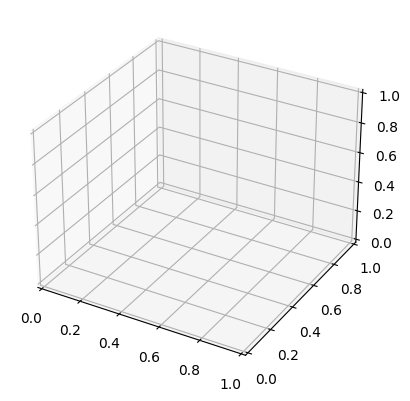

In [100]:
r, g, b = cv2.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

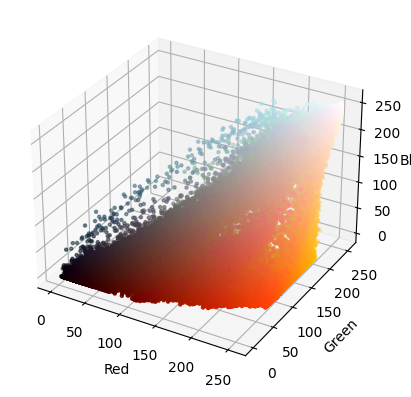

In [101]:
r, g, b = cv2.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = img.reshape((np.shape(img)[0]*np.shape(img)[1], 3))
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [102]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

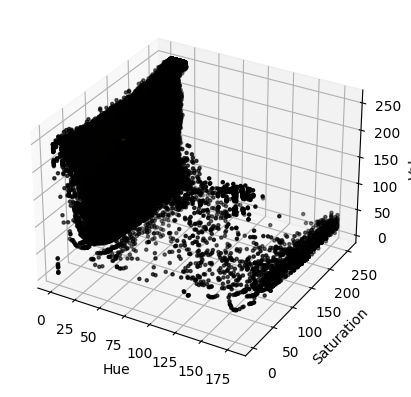

In [103]:
h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

hsv_pixel_colors = hsv_img.reshape((np.shape(hsv_img)[0] * np.shape(hsv_img)[1], 3))
hsv_pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=hsv_pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [104]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

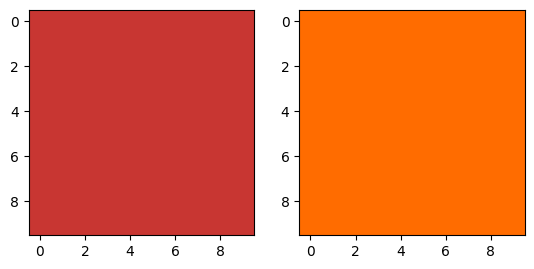

In [105]:
from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))

plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

In [106]:
mask = cv2.inRange(hsv_img, light_orange, dark_orange)

In [107]:
result = cv2.bitwise_and(img, img, mask=mask)

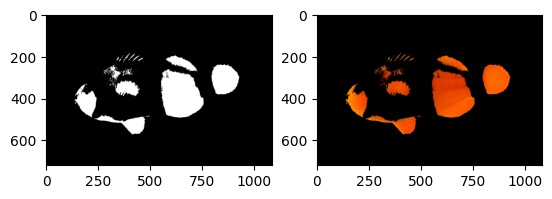

In [108]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [109]:
from google.colab.patches import cv2_imshow

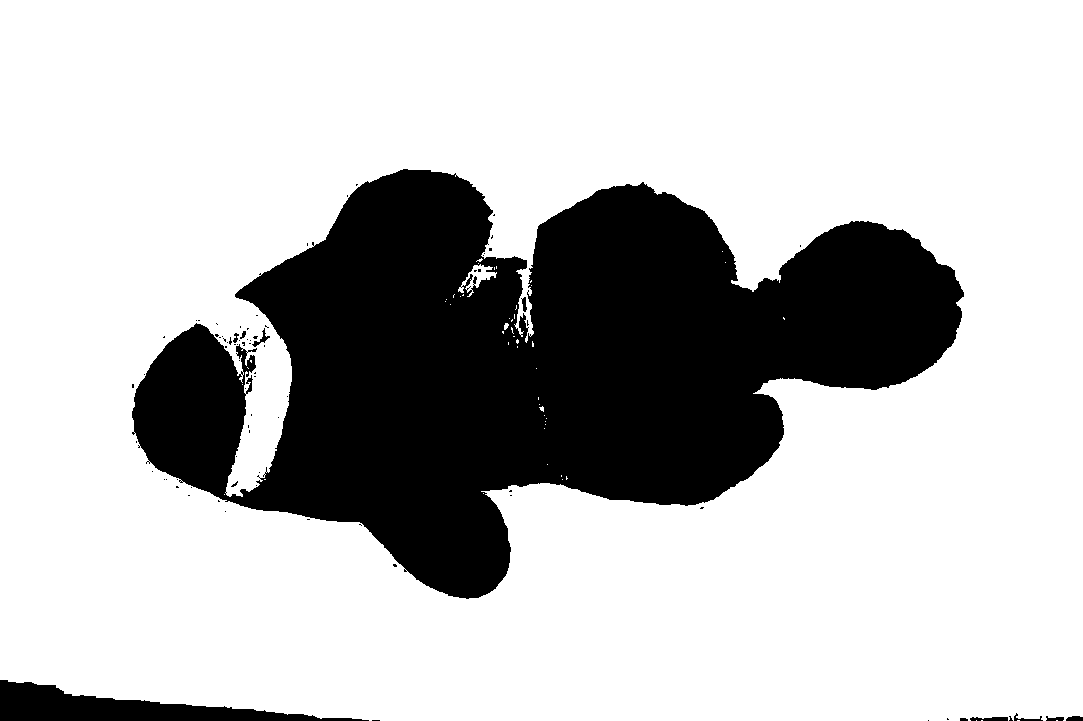

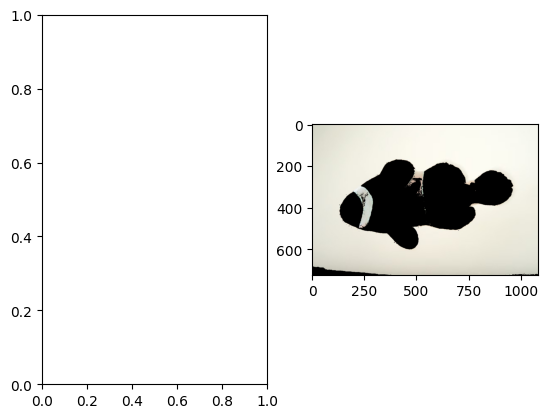

In [110]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

mask_white = cv2.inRange(hsv_img, light_white, dark_white)
result_white = cv2.bitwise_and(img, img, mask=mask_white)

plt.subplot(1, 2, 1)
cv2_imshow(mask_white)
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

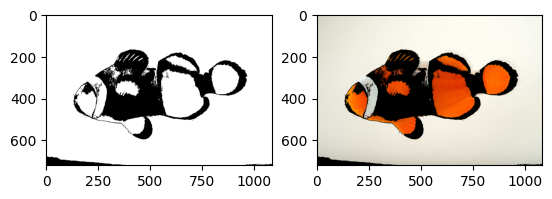

In [111]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(img, img, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [113]:
path = './sample_data/clownfish'

fishes = []
for i in range(5):
  friend = cv2.cvtColor(cv2.imread(path + str(i) + '.jpg'), cv2.COLOR_BGR2RGB)
  fishes.append(friend)

In [114]:
def segment_fish(image):
  hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
  light_orange = (1, 190, 200)
  dark_orange = (18, 255, 255)

  mask = cv2.inRange(hsv_image, light_orange, dark_orange)

  light_white = (0, 0, 200)
  dark_white = (145, 60, 255)

  mask_white = cv2.inRange(hsv_image, light_white, dark_white)

  final_mask = mask + mask_white
  result = cv2.bitwise_and(image, image, mask=final_mask)

  #clean up the segmentation using Gaussian blur
  blur = cv2.GaussianBlur(result, (7, 7), 0)
  return blur

In [117]:
results = [segment_fish(friend) for friend in fishes]

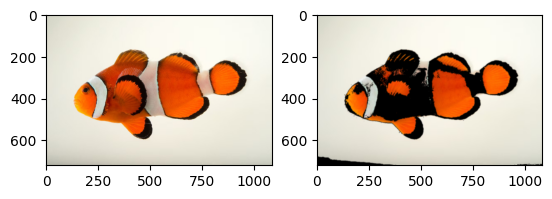

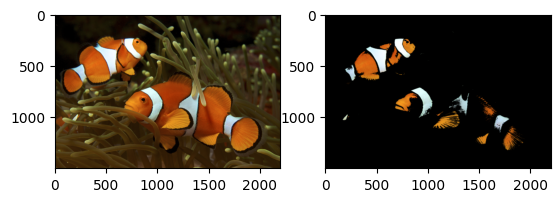

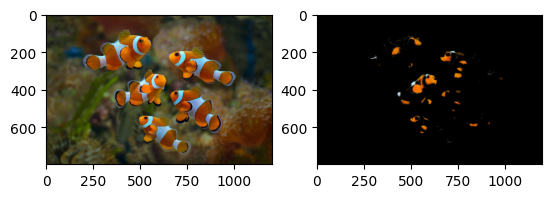

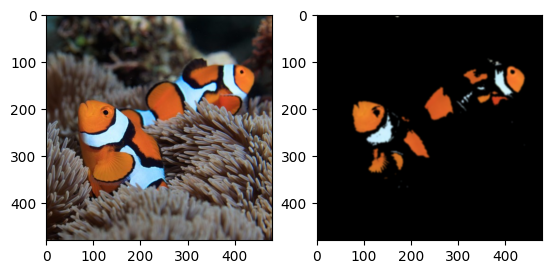

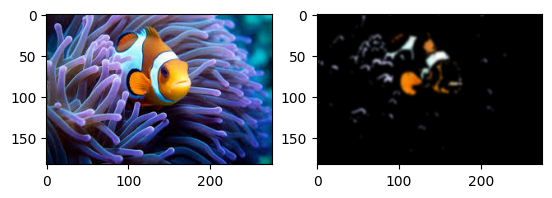

In [119]:
for i in range(5):
  plt.subplot(1, 2, 1)
  plt.imshow(fishes[i])
  plt.subplot(1, 2, 2)
  plt.imshow(results[i])
  plt.show()